# IML PROJECT

import librarirs


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
# %matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

appled= pd.read_csv('/content/apple_quality.csv')
appled.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
5,5.0,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523169,bad
6,6.0,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414170509,good
7,7.0,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125066,good
8,8.0,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871904758,bad
9,9.0,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185607723,bad


In [2]:

print(appled.shape)
print("No. of apples in given dataset : " +str(len(appled.index)))
print("No. of features given in dataset : 9")

(4001, 9)
No. of apples in given dataset : 4001
No. of features given in dataset : 9


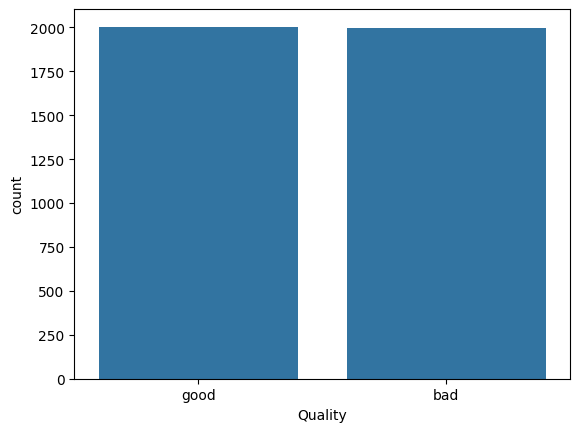

In [3]:

sns.countplot(x = "Quality", data = appled)
plt.show()

In [4]:

appled.info()
appled.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [5]:

appled.isnull()
appled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [6]:

appled.isnull().sum()



,0
A_id,1
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


So, there is null values at the last entry. So, let's remove it.

In [7]:
appled.drop("A_id", axis=1, inplace=True)
appled.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


data visuvalisation

In [8]:

dropna = appled.dropna()
dropna = dropna.iloc[:-1, :]
print(dropna)

          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0    -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...        ...       ...        ...          ...        ...       ...   
3994  1.482508 -2.581181  -0.306888     1.527877   1.056361  2.560829   
3995  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   

           Acidity Quality  
0     -0.491590483    good  
1     -0.722809367    good  
2      2.621636473     bad  
3      

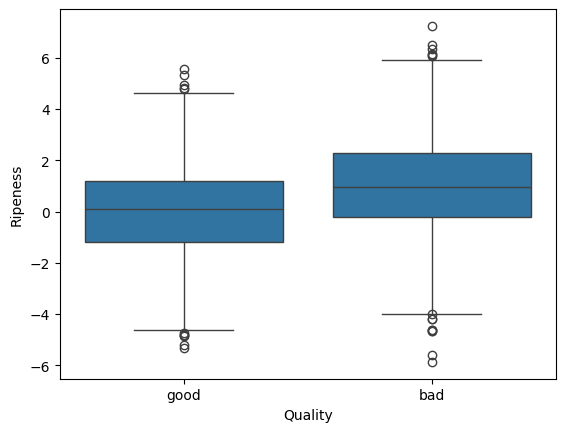

In [9]:
sns.boxplot(x="Quality", y="Ripeness", data=appled)
plt.show()

In [10]:

appled['Quality'] = appled['Quality'].map({'good': 1, 'bad': 0})
appled.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0


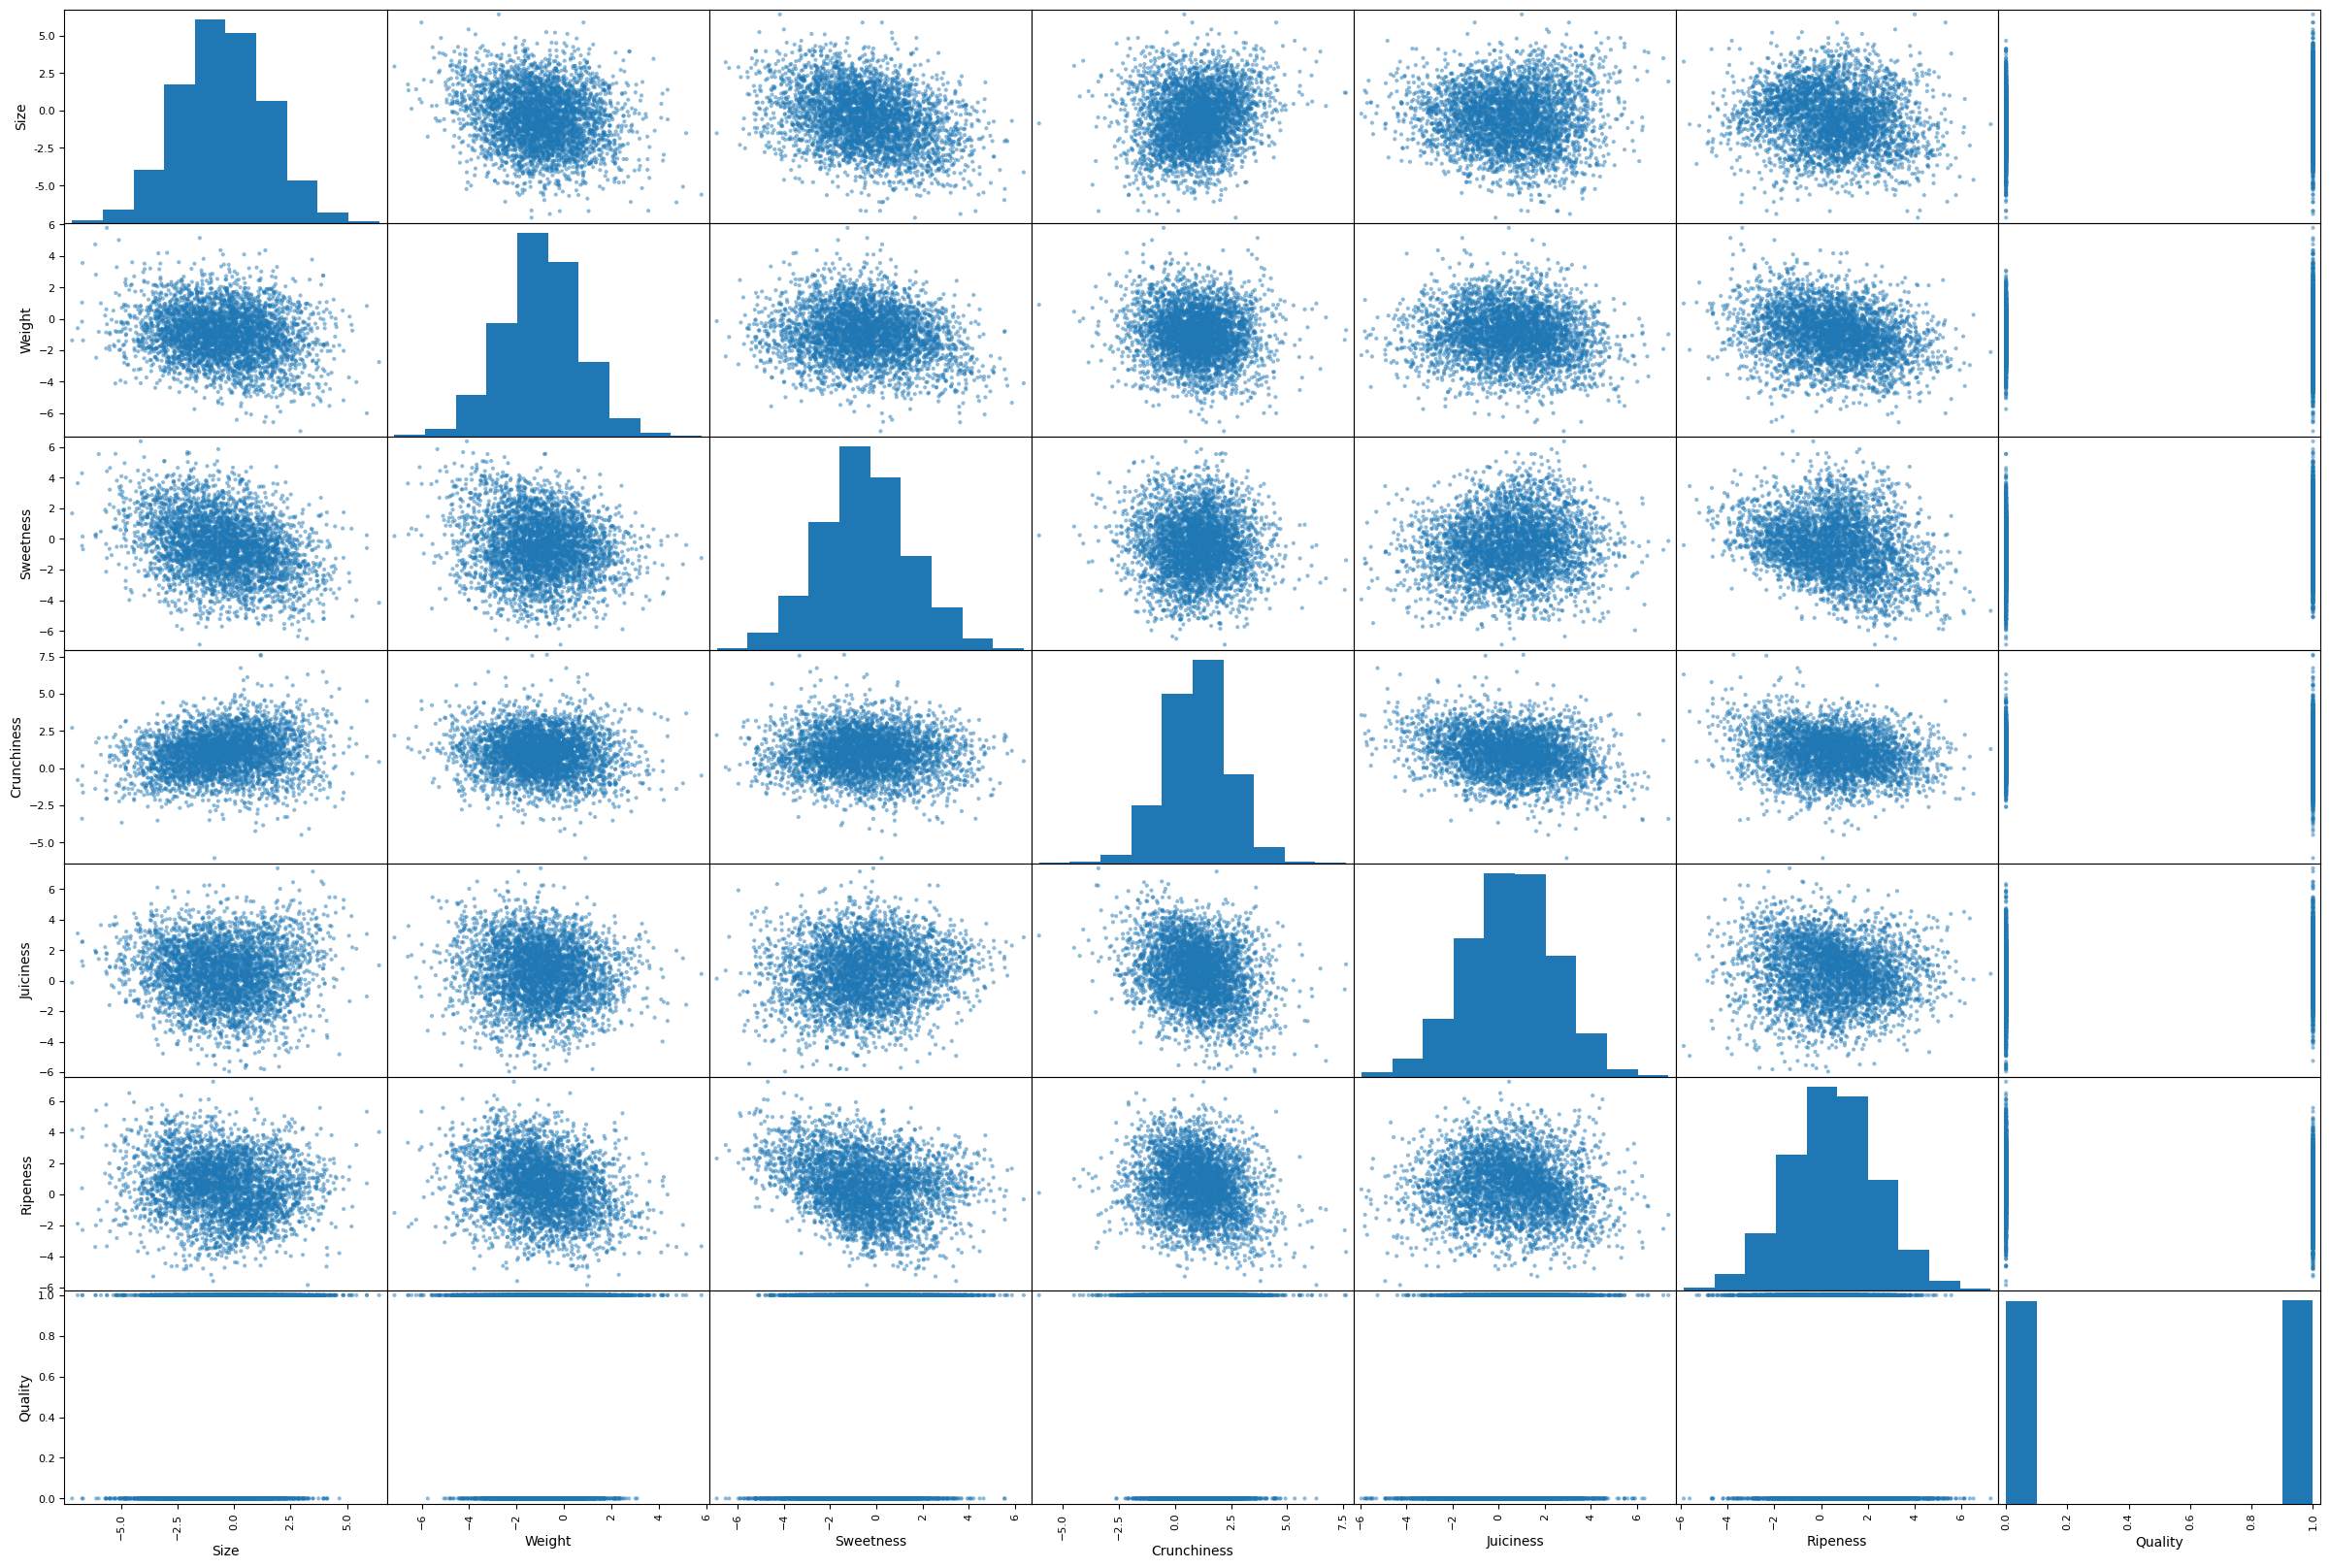

In [11]:
# the relationships b/w corresponding
plt.rcParams['figure.figsize']=[30,20]
from pandas.plotting import scatter_matrix
x=scatter_matrix(appled)
# print(x)
plt.show()

In [12]:
appled

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,1.0


In [13]:
appled = appled.dropna()
appled = appled.iloc[:-1, :]

In [14]:
appled

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0
...,...,...,...,...,...,...,...,...
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229254586,1.0
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0


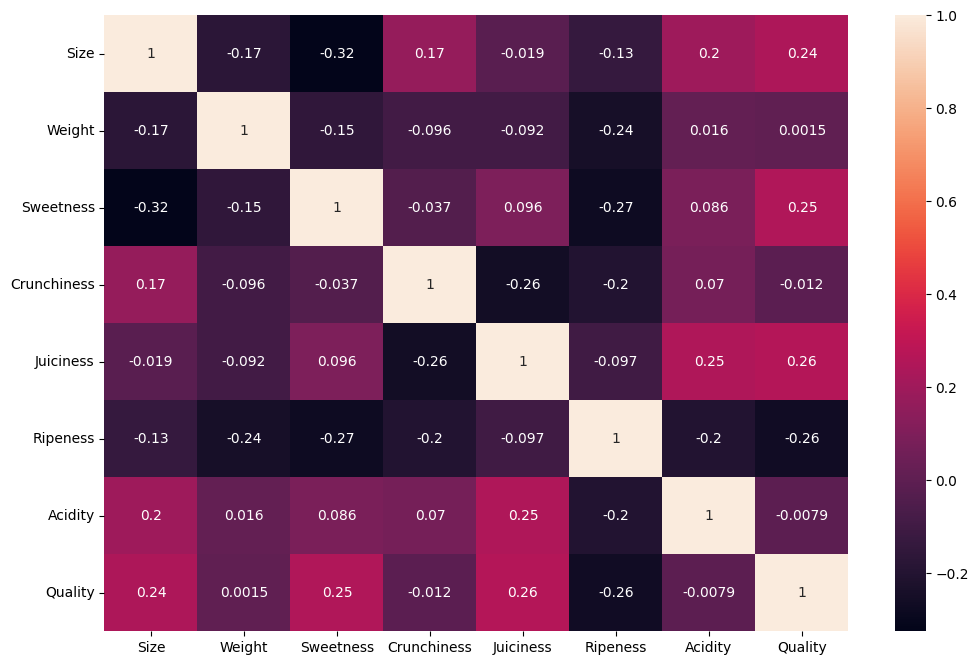

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(appled.corr(), annot=True)
plt.show()

In [16]:
!pip install plotly
import plotly.express as px

fig1 = px.scatter(appled, x="Weight", y="Size", color="Quality", title = 'Weight x Size')
fig1.show()

fig2 = px.scatter(appled, x="Sweetness", y="Crunchiness", color="Quality", title = 'Sweetness x Crunchiness')
fig2.show()

fig3 = px.scatter_3d(appled, x="Juiciness", y="Ripeness", z = 'Acidity',  color="Quality", title = 'Juiciness x Ripeness x Acidity')
fig3.show()

<ipython-input-17-0c5cd6ee4a5e>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




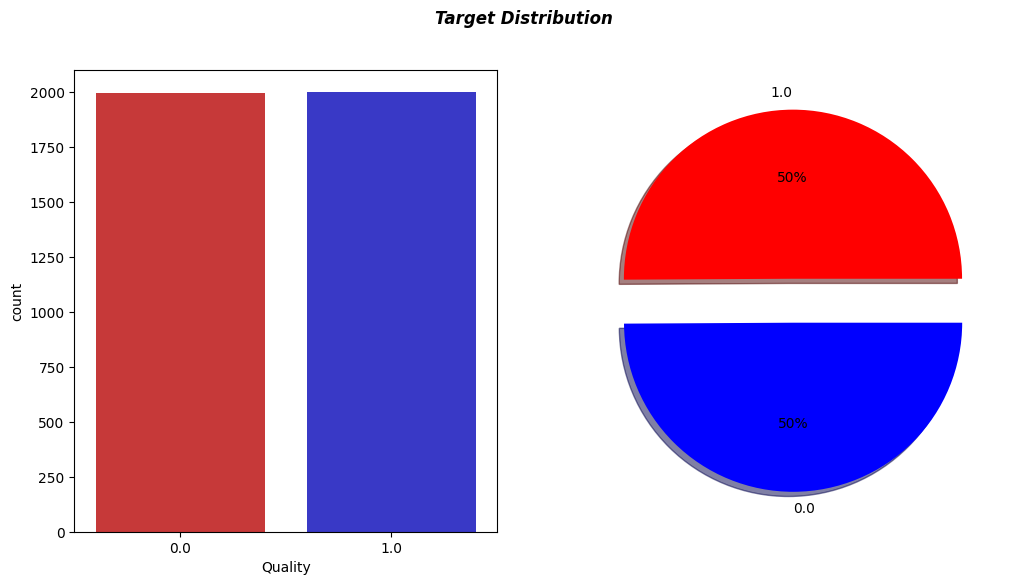

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))


sns.countplot(x = appled['Quality'], saturation = 0.55, palette = ['red', 'blue'], ax = ax[0])
ax[1].pie(appled['Quality'].value_counts(), labels = appled['Quality'].unique(),
          autopct = '%2.f%%', shadow = True, explode = [0.13] * len(appled['Quality'].value_counts().index), colors = ['red', 'blue'])
plt.suptitle('Target Distribution', style = 'italic', weight = 'bold')
plt.show()

### Logistic Regression

In [18]:
# dats spliting
X = appled.drop('Quality', axis = 1)
y = appled['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.12, random_state = 0)
X_train.shape, X_test.shape

((3519, 7), (480, 7))

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model train

In [20]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
predictions = model.predict(X_test)
print("Accuracy_logistic_regression:", accuracy_score(y_test, predictions))

Accuracy_logistic_regression: 0.76875


linear regresion

In [22]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
predict = (y_pred >= 0.5).astype(int)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

accuracy = accuracy_score(y_test, predict)
print("Accuracy Score_Lr:", accuracy)

Linear Regression Model Performance:
Mean Squared Error: 0.1659019664894075
R-squared Score: 0.33639213404237
Accuracy Score_Lr: 0.7645833333333333


In [33]:
"""Since this is a binary classification problem, additional metrics,
   like precision, recall, and F1-score will provide more insights into model performance."""
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

""""""
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy:", cross_val_accuracy.mean())

model = LogisticRegression(C=0.1)

              precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       240
         1.0       0.76      0.79      0.77       240

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Cross-validated Accuracy: 0.7466836670838549


knn

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('/content/apple_quality.csv')

scores = []
for i in range(1, 16):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

print(scores)

knn_model = KNeighborsClassifier(n_neighbors=12)

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)


accuracy_score = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors Model Performance:")
print("Accuracy_KNN:", accuracy_score)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[0.8895833333333333, 0.88125, 0.9, 0.8958333333333334, 0.8958333333333334, 0.9104166666666667, 0.9166666666666666, 0.9104166666666667, 0.9125, 0.9145833333333333, 0.9125, 0.91875, 0.90625, 0.9145833333333333, 0.9104166666666667]
K-Nearest Neighbors Model Performance:
Accuracy_KNN: 0.91875
Confusion Matrix:
 [[218  22]
 [ 17 223]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.91      0.92       240
         1.0       0.91      0.93      0.92       240

    accuracy                           0.92       480
   macro avg       0.92      0.92      0.92       480
weighted avg       0.92      0.92      0.92       480



### SVM

svm02

In [35]:


# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

First, we check with linear SVM...

In [36]:
# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
from sklearn.metrics import accuracy_score  # Ensure the correct import
# Predictions and evaluation
y_pred = svm_model.predict(X_test)
print("SVM linear model Accuracy:", accuracy_score(y_test, y_pred))


SVM linear model Accuracy: 0.7645833333333333


Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       240
         1.0       0.75      0.79      0.77       240

    accuracy                           0.76       480
   macro avg       0.77      0.76      0.76       480
weighted avg       0.77      0.76      0.76       480

Confusion Matrix:
 [[178  62]
 [ 51 189]]
Tuned SVM Model Accuracy with C=100.0: 0.76875
Tuned Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       240
         1.0       0.76      0.79      0.77       240

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Tuned Confusion Matrix:
 [[179  61]
 [ 50 190]]


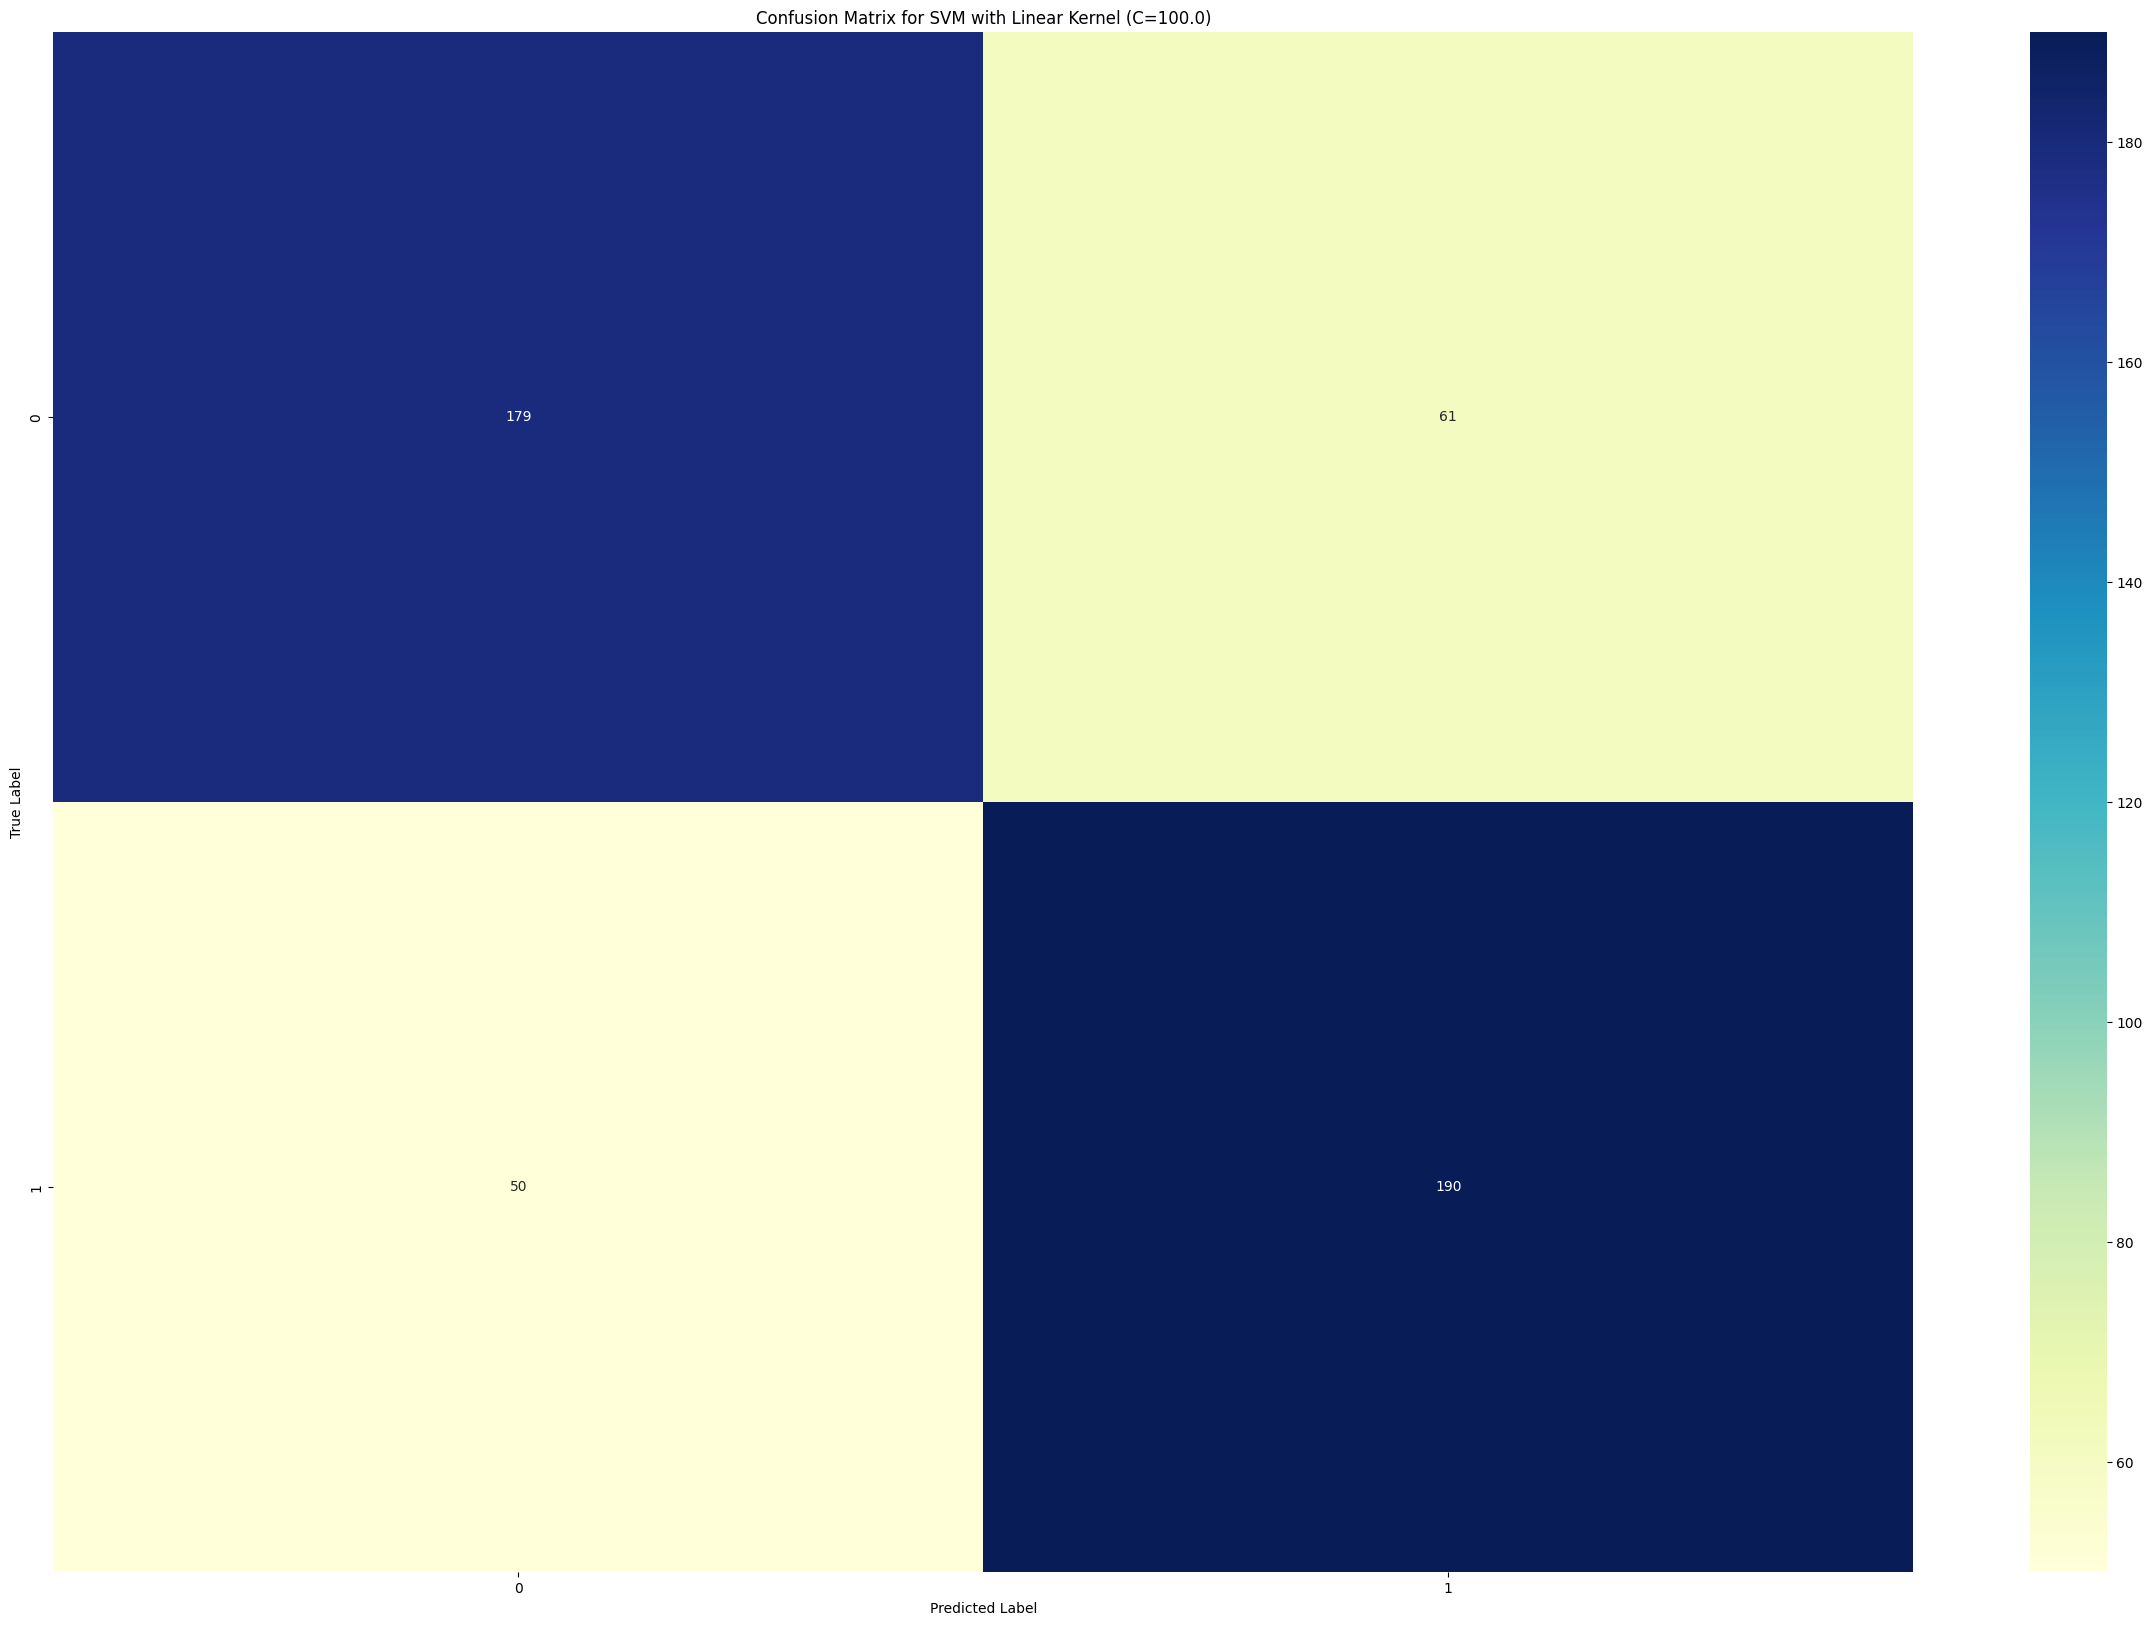

In [39]:
# Display classification report and confusion matrix for further insights
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



tuned_model = SVC(kernel='linear', C=100.0)
tuned_model.fit(X_train, y_train)
tuned_y_pred = tuned_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
print("Tuned SVM Model Accuracy with C=100.0:", tuned_accuracy)


print("Tuned Classification Report:\n", classification_report(y_test, tuned_y_pred))
print("Tuned Confusion Matrix:\n", confusion_matrix(y_test, tuned_y_pred))

sns.heatmap(confusion_matrix(y_test, tuned_y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for SVM with Linear Kernel (C=100.0)")
plt.show()

Now, let us check for rest of the kernels...


Evaluating SVM with linear kernel...
Accuracy with linear kernel: 0.7688
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76       240
         1.0       0.76      0.79      0.77       240

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

Confusion Matrix:
 [[179  61]
 [ 50 190]]


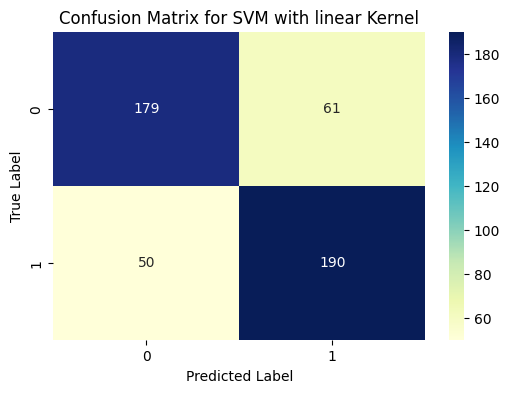


Evaluating SVM with rbf kernel...
Accuracy with rbf kernel: 0.9062
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.90      0.91       240
         1.0       0.90      0.92      0.91       240

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480

Confusion Matrix:
 [[215  25]
 [ 20 220]]


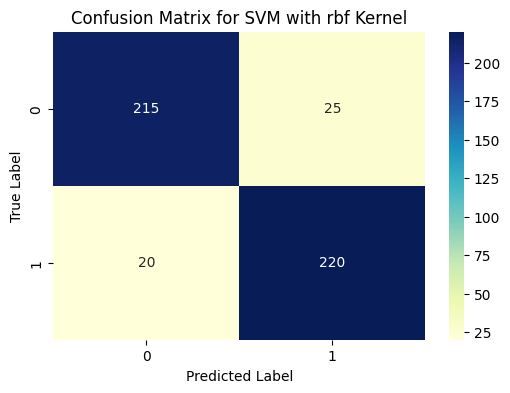


Evaluating SVM with poly kernel...
Accuracy with poly kernel: 0.8313
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84       240
         1.0       0.89      0.76      0.82       240

    accuracy                           0.83       480
   macro avg       0.84      0.83      0.83       480
weighted avg       0.84      0.83      0.83       480

Confusion Matrix:
 [[217  23]
 [ 58 182]]


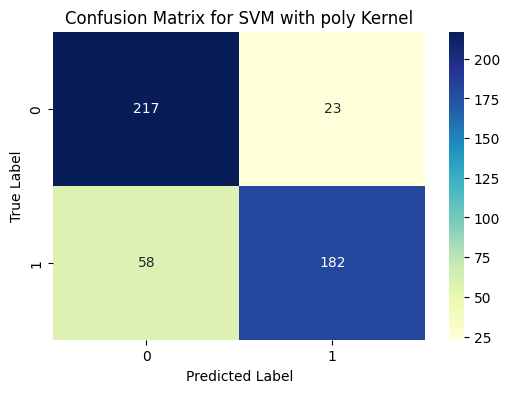


Evaluating SVM with sigmoid kernel...
Accuracy with sigmoid kernel: 0.6333
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.63      0.63       240
         1.0       0.63      0.63      0.63       240

    accuracy                           0.63       480
   macro avg       0.63      0.63      0.63       480
weighted avg       0.63      0.63      0.63       480

Confusion Matrix:
 [[152  88]
 [ 88 152]]


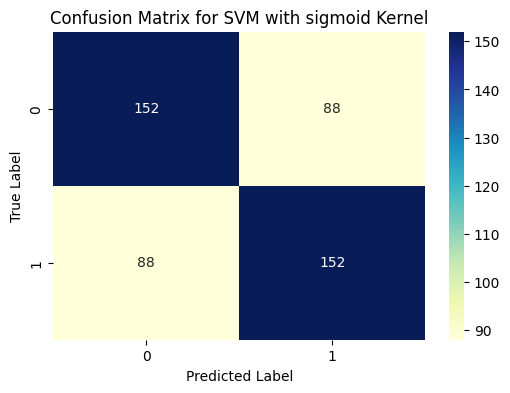


Summary of Accuracies:
Linear Kernel Accuracy: 0.7688
Rbf Kernel Accuracy: 0.9062
Poly Kernel Accuracy: 0.8313
Sigmoid Kernel Accuracy: 0.6333


In [40]:



# List to store kernel types and results
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\nEvaluating SVM with {kernel} kernel...")

    svm_model = SVC(kernel=kernel, C=100.0)
    svm_model.fit(X_train, y_train)


    y_pred = svm_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy


    print(f"Accuracy with {kernel} kernel: {accuracy:.4f}")


    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for SVM with {kernel} Kernel")
    plt.show()


print("\nSummary of Accuracies:")
for kernel, accuracy in results.items():
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracy:.4f}")


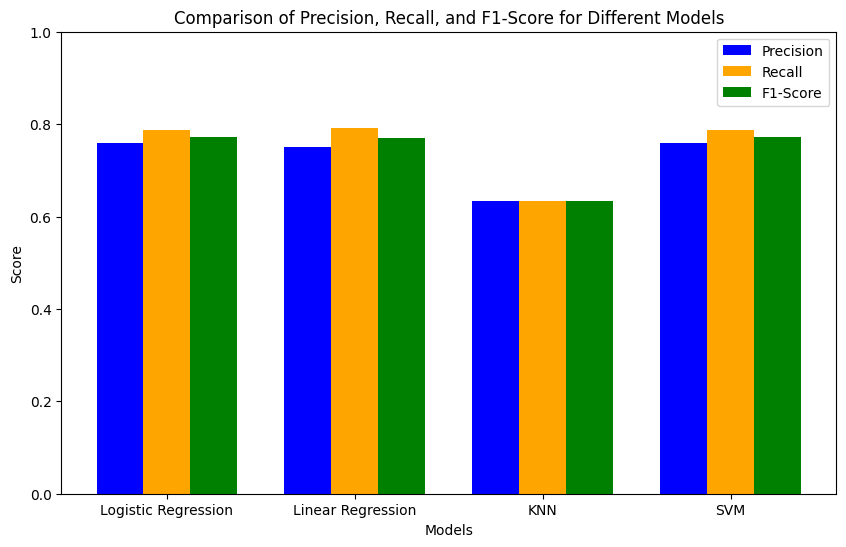

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_logistic = predictions
y_pred_linear = predict
y_pred_knn = y_pred
y_pred_svm = predictions


def calculate_metrics(y_true, y_pred):
    """Calculates precision, recall, and F1-score for a given set of true and predicted labels."""
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1


precision_logistic, recall_logistic, f1_logistic = calculate_metrics(y_test, y_pred_logistic)
precision_linear, recall_linear, f1_linear = calculate_metrics(y_test, y_pred_linear)
precision_knn, recall_knn, f1_knn = calculate_metrics(y_test, y_pred_knn)
precision_svm, recall_svm, f1_svm = calculate_metrics(y_test, y_pred_svm)


models = ['Logistic Regression', 'Linear Regression', 'KNN', 'SVM']
precision_scores = [precision_logistic, precision_linear, precision_knn, precision_svm]
recall_scores = [recall_logistic, recall_linear, recall_knn, recall_svm]
f1_scores = [f1_logistic, f1_linear, f1_knn, f1_svm]


plt.figure(figsize=(10, 6))
bar_width = 0.25
index = np.arange(len(models))

plt.bar(index, precision_scores, bar_width, label='Precision', color='blue')
plt.bar([i + bar_width for i in index], recall_scores, bar_width, label='Recall', color='orange')
plt.bar([i + 2 * bar_width for i in index], f1_scores, bar_width, label='F1-Score', color='green')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Comparison of Precision, Recall, and F1-Score for Different Models')
plt.xticks([i + bar_width for i in index], models)
plt.ylim(0, 1)
plt.legend()
plt.show()

Hyperparameter tuning

In [42]:
# Define LogisticRegressionScratch class for binary classification
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

Learning Rate: 0.001, Iterations: 500, Accuracy: 0.7229166666666667
Learning Rate: 0.001, Iterations: 1000, Accuracy: 0.7229166666666667
Learning Rate: 0.001, Iterations: 1500, Accuracy: 0.7229166666666667
Learning Rate: 0.01, Iterations: 500, Accuracy: 0.7333333333333333
Learning Rate: 0.01, Iterations: 1000, Accuracy: 0.7541666666666667
Learning Rate: 0.01, Iterations: 1500, Accuracy: 0.75
Learning Rate: 0.1, Iterations: 500, Accuracy: 0.7604166666666666
Learning Rate: 0.1, Iterations: 1000, Accuracy: 0.7666666666666667
Learning Rate: 0.1, Iterations: 1500, Accuracy: 0.7708333333333334


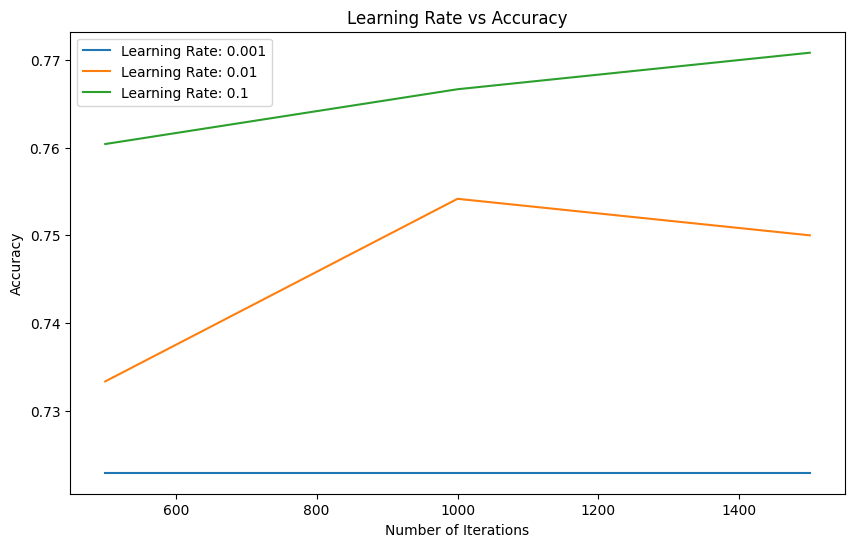

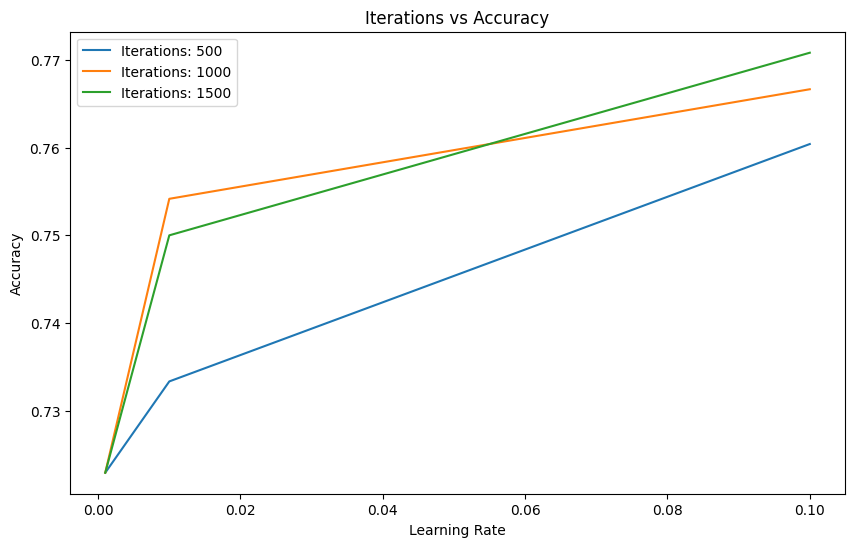

In [43]:
# hyper parameter testing
learning_rates = [0.001, 0.01, 0.1]
num_iterations_list = [500, 1000, 1500]

for learning_rate in learning_rates:
  for num_iterations in num_iterations_list:
    model_scratch = LogisticRegressionScratch(learning_rate=learning_rate, num_iterations=num_iterations)
    model_scratch.fit(X_train, y_train)
    y_pred_scratch = model_scratch.predict(X_test)
    accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
    print(f"Learning Rate: {learning_rate}, Iterations: {num_iterations}, Accuracy: {accuracy_scratch}")

learning_rate_accuracy = {}
iterations_accuracy = {}

for learning_rate in learning_rates:
  learning_rate_accuracy[learning_rate] = []
for num_iterations in num_iterations_list:
  iterations_accuracy[num_iterations] = []

for learning_rate in learning_rates:
    for num_iterations in num_iterations_list:
        model_scratch = LogisticRegressionScratch(learning_rate=learning_rate, num_iterations=num_iterations)
        model_scratch.fit(X_train, y_train)
        y_pred_scratch = model_scratch.predict(X_test)
        accuracy_scratch = accuracy_score(y_test, y_pred_scratch)

        learning_rate_accuracy[learning_rate].append(accuracy_scratch)
        iterations_accuracy[num_iterations].append(accuracy_scratch)


plt.figure(figsize=(10, 6))
for learning_rate, accuracy_list in learning_rate_accuracy.items():
  plt.plot(num_iterations_list, accuracy_list, label=f"Learning Rate: {learning_rate}")
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.title("Learning Rate vs Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for num_iterations, accuracy_list in iterations_accuracy.items():
  plt.plot(learning_rates, accuracy_list, label=f"Iterations: {num_iterations}")

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.legend()
plt.show()